# (Practice) Explaining Single Observations- Amber Kutscher


# The Task

Revisit your (Optional) Extended Practice: Global Explanations with Shap assignment and add a new section for local explanations at the bottom.

Select at least 2 observations  (students) to produce local explanations for using either Lime or SHAP.

# The Data

**Data Dictionary**

*Attributes for both student-mat.csv (Math course) and student-por.csv (Portuguese language course) datasets:*

1. school - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)
2. sex - student's sex (binary: 'F' - female or 'M' - male)
3. age - student's age (numeric: from 15 to 22)
4. address - student's home address type (binary: 'U' - urban or 'R' - rural)
5. famsize - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)
6. Pstatus - parent's cohabitation status (binary: 'T' - living together or 'A' - apart
7. Medu - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 - 5th to 9th grade, 3 - secondary education or 4 - higher education)
8. Fedu - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 - 5th to 9th grade, 3 - secondary education or 4 - higher education)
9. Mjob - mother's job (n18 paiominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
10. Fjob - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
11. reason - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')
12. guardian - student's guardian (nominal: 'mother', 'father' or 'other')
13. traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)
14. studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
15. failures - number of past class failures (numeric: n if 1<=n<3, else 4)
16. schoolsup - extra educational support (binary: yes or no)
17. famsup - family educational support (binary: yes or no)
18. paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)
19. activities - extra-curricular activities (binary: yes or no)
20. nursery - attended nursery school (binary: yes or no)
21. higher - wants to take higher education (binary: yes or no)
22. internet - Internet access at home (binary: yes or no)
23. romantic - with a romantic relationship (binary: yes or no)
24. famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
25. freetime - free time after school (numeric: from 1 - very low to 5 - very high)
26. goout - going out with friends (numeric: from 1 - very low to 5 - very high)
27. Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
28. Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
29. health - current health status (numeric: from 1 - very bad to 5 - very good)
30. absences - number of school absences (numeric: from 0 to 93)
31. G1 - first period grade (numeric: from 0 to 20)
32. G2 - second period grade (numeric: from 0 to 20)
33. G3 - final grade (numeric: from 0 to 20, output target)

# Imports and Data Load

In [1]:
# Standard imports
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Additional required imports
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer, make_column_selector, ColumnTransformer
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn import metrics
from sklearn.base import clone

# Fixing random for reproducibility
SEED = 321
np.random.seed(SEED)

# Customization options
pd.set_option("display.max_columns", 100)
plt.style.use(('ggplot', 'tableau-colorblind10'))

In [2]:
url = "https://docs.google.com/spreadsheets/d/e/2PACX-1vS6xDKNpWkBBdhZSqepy48bXo55QnRv1Xy6tXTKYzZLMPjZozMfYhHQjAcC8uj9hQ/pub?output=xlsx"
df = pd.read_excel(url, sheet_name='student-mat')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


# Create a classification model to predict if a student will Pass or Fail their final Math Grade (G3).

## Create the Target

In [3]:
df['G3(%)'] = (df['G3']/20)*100
df['G3(%)'].head()

0    30.0
1    30.0
2    50.0
3    75.0
4    50.0
Name: G3(%), dtype: float64

In [4]:
# Defining bins and their labels
bins = [0, 60, 70, 80, 90, 101]
bin_labels = ['F', 'D', 'C', 'B', 'A']
pd.cut(df['G3(%)'], bins, labels=bin_labels, include_lowest=True)

0      F
1      F
2      F
3      C
4      F
      ..
390    F
391    C
392    F
393    F
394    F
Name: G3(%), Length: 395, dtype: category
Categories (5, object): ['F' < 'D' < 'C' < 'B' < 'A']

In [5]:
df['FinalGrade'] = pd.cut(df['G3(%)'], bins, labels=bin_labels, 
                          include_lowest=True)
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,G3(%),FinalGrade
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6,30.0,F
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6,30.0,F
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10,50.0,F
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15,75.0,C
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10,50.0,F
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,course,other,1,2,2,no,yes,yes,no,yes,yes,no,no,5,5,4,4,5,4,11,9,9,9,45.0,F
391,MS,M,17,U,LE3,T,3,1,services,services,course,mother,2,1,0,no,no,no,no,no,yes,yes,no,2,4,5,3,4,2,3,14,16,16,80.0,C
392,MS,M,21,R,GT3,T,1,1,other,other,course,other,1,1,3,no,no,no,no,no,yes,no,no,5,5,3,3,3,3,3,10,8,7,35.0,F
393,MS,M,18,R,LE3,T,3,2,services,other,course,mother,3,1,0,no,no,no,no,no,yes,yes,no,4,4,1,3,4,5,0,11,12,10,50.0,F


In [6]:
# Define target as had a F or Above
df['target_F'] = df['FinalGrade'] == 'F'
df['target_F'].value_counts(normalize=True)

True     0.668354
False    0.331646
Name: target_F, dtype: float64

## Preprocessing

In [7]:
# Make x and y variables
drop_feats = ['G1', 'G2', 'G3', 'G3(%)', 'FinalGrade']
y = df['target_F'].copy()
X = df.drop(columns=['target_F', *drop_feats]).copy()
# Train-test-spliot
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=SEED)

In [8]:
# make categorical & numeric selectors
cat_sel = make_column_selector(dtype_include='object')
num_sel = make_column_selector(dtype_include='number')
# make pipelines for categorical vs numeric data
cat_pipe = make_pipeline(SimpleImputer(strategy='constant',
                                     fill_value='MISSING'),
                         OneHotEncoder(drop='if_binary', sparse=False))
num_pipe = make_pipeline(SimpleImputer(strategy='mean'))
# make the preprocessing column transformer
preprocessor = make_column_transformer((num_pipe, num_sel),
                                       (cat_pipe, cat_sel),
                                       verbose_feature_names_out=False)
# fit column transformer and run get_feature_names_out
preprocessor.fit(X_train)
feature_names = preprocessor.get_feature_names_out()
X_train_df = pd.DataFrame(preprocessor.transform(X_train),
                           columns = feature_names, index = X_train.index)
X_test_df = pd.DataFrame(preprocessor.transform(X_test),
                           columns = feature_names, index = X_test.index)
X_test_df.head(3)

C:\Users\amber\anaconda3\envs\dojo-env\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,school_MS,sex_M,address_U,famsize_LE3,Pstatus_T,Mjob_at_home,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_at_home,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other,schoolsup_yes,famsup_yes,paid_yes,activities_yes,nursery_yes,higher_yes,internet_yes,romantic_yes
58,15.0,1.0,2.0,1.0,2.0,0.0,4.0,3.0,2.0,1.0,1.0,5.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0
338,18.0,3.0,3.0,1.0,4.0,0.0,5.0,3.0,3.0,1.0,1.0,1.0,7.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0
291,17.0,4.0,3.0,1.0,3.0,0.0,4.0,2.0,2.0,1.0,2.0,3.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0


In [9]:
def evaluate_classification(model, X_train, y_train, X_test, y_test,
                            normalize='true', cmap='Blues', figsize=(10,5)):
    header="\tCLASSIFICATION REPORT"
    dashes='--'*40
    print(f"{dashes}\n{header}\n{dashes}")
    # training data
    print('[i] Training Data:')
    y_pred_train = model.predict(X_train)
    report_train = metrics.classification_report(y_train, y_pred_train)
    print(report_train)
    fig,ax = plt.subplots(figsize=figsize,ncols=2)
    metrics.ConfusionMatrixDisplay.from_estimator(model, X_train, y_train,
                                                  normalize=normalize,
                                                  cmap=cmap, ax=ax[0])
    metrics.RocCurveDisplay.from_estimator(model, X_train, y_train, ax=ax[1])
    ax[1].plot([0,1],[0,1],ls=':')
    ax[1].grid()
    
    fig.tight_layout()
    plt.show()
     
    print(dashes)
    # test data
    print(f"[i] Test Data:")
    y_pred_test = model.predict(X_test)
    report_test = metrics.classification_report(y_test, y_pred_test)
    print(report_test)
    fig,ax = plt.subplots(figsize=figsize,ncols=2)
    metrics.ConfusionMatrixDisplay.from_estimator(model, X_test, y_test,
                                                  normalize=normalize,
                                                  cmap=cmap, ax=ax[0])
    metrics.RocCurveDisplay.from_estimator(model, X_test, y_test, ax=ax[1])
    ax[1].plot([0,1],[0,1],ls=':')
    ax[1].grid()
    fig.tight_layout()
    plt.show()

## Evaluate its performance on the training and test data.

### Random Forest

--------------------------------------------------------------------------------
	CLASSIFICATION REPORT
--------------------------------------------------------------------------------
[i] Training Data:
              precision    recall  f1-score   support

       False       1.00      1.00      1.00       101
        True       1.00      1.00      1.00       195

    accuracy                           1.00       296
   macro avg       1.00      1.00      1.00       296
weighted avg       1.00      1.00      1.00       296



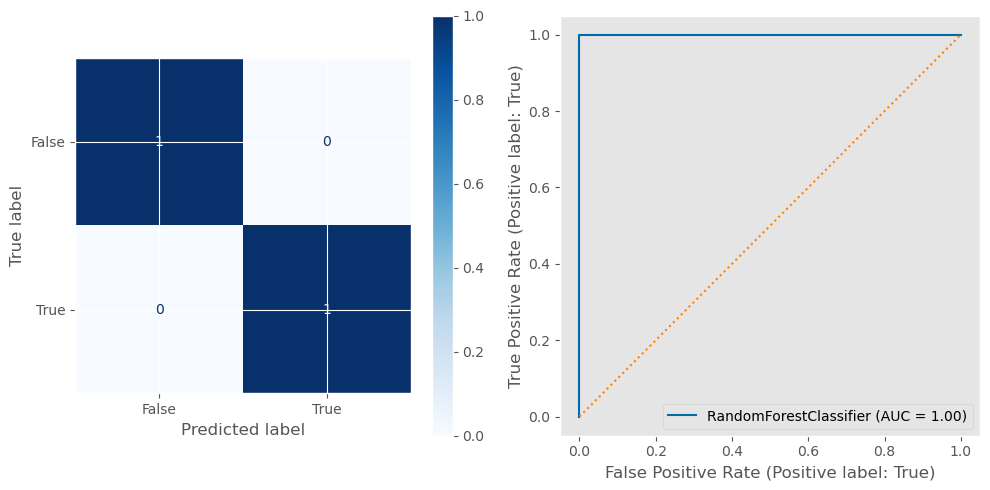

--------------------------------------------------------------------------------
[i] Test Data:
              precision    recall  f1-score   support

       False       0.79      0.37      0.50        30
        True       0.78      0.96      0.86        69

    accuracy                           0.78        99
   macro avg       0.78      0.66      0.68        99
weighted avg       0.78      0.78      0.75        99



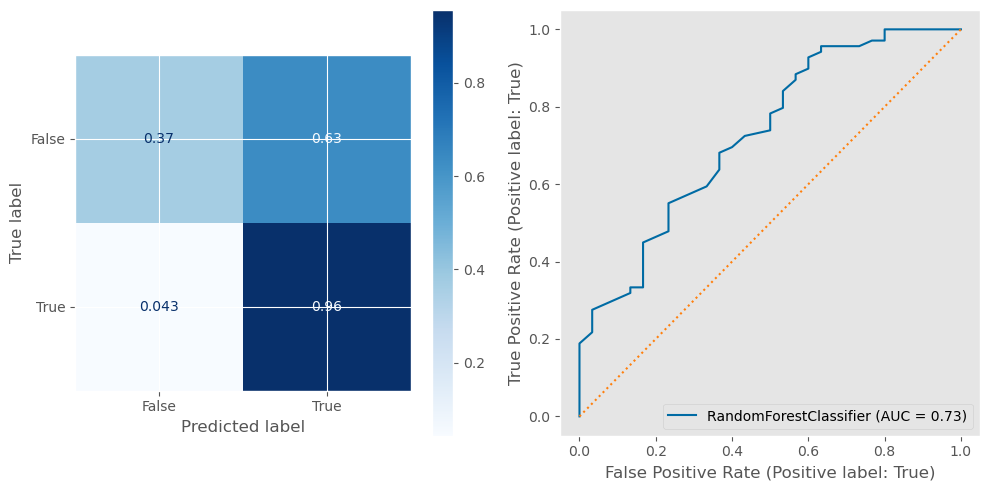

In [10]:
# Fit random forest
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train_df, y_train)
evaluate_classification(rf_clf, X_train_df, y_train, X_test_df, y_test)

## Extract and visualize coefficients or feature importance (depending on the model type selected).

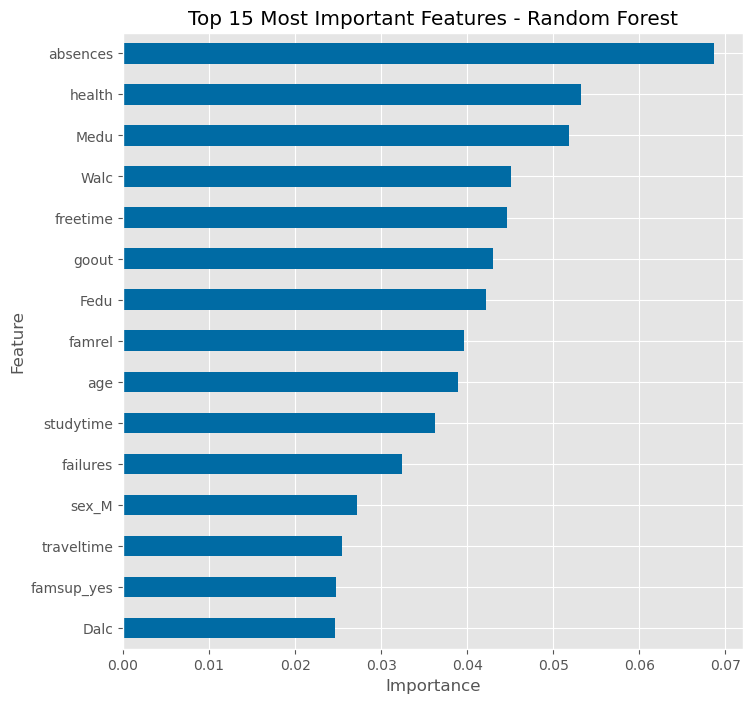

In [11]:
# Saving the feature importances
importances = pd.Series(rf_clf.feature_importances_, index=feature_names,
                       name='RandomForest Feature Importance')
ax = importances.sort_values().tail(15).plot(kind='barh', figsize=(8,8))
ax.set(title='Top 15 Most Important Features - Random Forest',
       ylabel='Feature', xlabel='Importance');

In [12]:
# Import shap and initialize javascript
import shap
shap.initjs()

In [13]:
len(X_train_df)

296

In [14]:
# Get the x-values -- Using the entire dataset
X_shap = pd.concat([X_train_df, X_test_df])
X_shap

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,school_MS,sex_M,address_U,famsize_LE3,Pstatus_T,Mjob_at_home,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_at_home,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other,schoolsup_yes,famsup_yes,paid_yes,activities_yes,nursery_yes,higher_yes,internet_yes,romantic_yes
215,17.0,3.0,2.0,2.0,2.0,0.0,4.0,4.0,4.0,1.0,3.0,1.0,2.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0
48,15.0,4.0,2.0,1.0,2.0,0.0,4.0,3.0,3.0,2.0,2.0,5.0,2.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0
303,17.0,3.0,2.0,1.0,4.0,0.0,5.0,2.0,2.0,1.0,2.0,5.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0
160,17.0,2.0,1.0,2.0,1.0,2.0,3.0,3.0,2.0,2.0,2.0,5.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0
60,16.0,4.0,4.0,1.0,2.0,0.0,2.0,4.0,4.0,2.0,3.0,4.0,6.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,17.0,4.0,4.0,2.0,2.0,0.0,3.0,3.0,3.0,2.0,3.0,4.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0
65,16.0,4.0,3.0,3.0,2.0,0.0,5.0,4.0,3.0,1.0,2.0,1.0,2.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0
30,15.0,4.0,4.0,1.0,2.0,0.0,5.0,4.0,2.0,3.0,4.0,5.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0
141,16.0,2.0,2.0,2.0,1.0,2.0,2.0,3.0,3.0,2.0,2.0,2.0,8.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0


In [15]:
# Get the y-values
y_shap = pd.concat([y_train, y_test])
y_shap

215    False
48     False
303    False
160     True
60      True
       ...  
241     True
65     False
30      True
141     True
296     True
Name: target_F, Length: 395, dtype: bool

## Apply the SHAP package and create a summary plot of the SHAP values for your model.

In [16]:
X_shap = X_shap.reset_index(drop=True)
y_shap = y_shap.reset_index(drop=True)
X_shap

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,school_MS,sex_M,address_U,famsize_LE3,Pstatus_T,Mjob_at_home,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_at_home,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other,schoolsup_yes,famsup_yes,paid_yes,activities_yes,nursery_yes,higher_yes,internet_yes,romantic_yes
0,17.0,3.0,2.0,2.0,2.0,0.0,4.0,4.0,4.0,1.0,3.0,1.0,2.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0
1,15.0,4.0,2.0,1.0,2.0,0.0,4.0,3.0,3.0,2.0,2.0,5.0,2.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0
2,17.0,3.0,2.0,1.0,4.0,0.0,5.0,2.0,2.0,1.0,2.0,5.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0
3,17.0,2.0,1.0,2.0,1.0,2.0,3.0,3.0,2.0,2.0,2.0,5.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0
4,16.0,4.0,4.0,1.0,2.0,0.0,2.0,4.0,4.0,2.0,3.0,4.0,6.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,17.0,4.0,4.0,2.0,2.0,0.0,3.0,3.0,3.0,2.0,3.0,4.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0
391,16.0,4.0,3.0,3.0,2.0,0.0,5.0,4.0,3.0,1.0,2.0,1.0,2.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0
392,15.0,4.0,4.0,1.0,2.0,0.0,5.0,4.0,2.0,3.0,4.0,5.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0
393,16.0,2.0,2.0,2.0,1.0,2.0,2.0,3.0,3.0,2.0,2.0,2.0,8.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0


In [17]:
# Create a SHAP explainer using your fit model
explainer = shap.Explainer(rf_clf)
explainer

In [18]:
# Getting the shap values
shap_values = explainer(X_shap, y_shap)
shap_values.shape

(395, 43, 2)

In [19]:
shap_vals_F = shap_values[:,:,1]
shap_vals_F.shape

(395, 43)

In [20]:
# Get final predictions
y_pred = rf_clf.predict(X_shap)
y_pred = pd.Series(y_pred, index=X_shap.index, name='Predicted')
y_pred

0      False
1      False
2      False
3       True
4       True
       ...  
390     True
391     True
392    False
393     True
394     True
Name: Predicted, Length: 395, dtype: bool

In [21]:
y_proba = rf_clf.predict_proba(X_shap)
y_proba

array([[0.8 , 0.2 ],
       [0.76, 0.24],
       [0.84, 0.16],
       [0.03, 0.97],
       [0.26, 0.74],
       [0.78, 0.22],
       [0.12, 0.88],
       [0.09, 0.91],
       [0.14, 0.86],
       [0.13, 0.87],
       [0.1 , 0.9 ],
       [0.22, 0.78],
       [0.84, 0.16],
       [0.72, 0.28],
       [0.66, 0.34],
       [0.8 , 0.2 ],
       [0.16, 0.84],
       [0.75, 0.25],
       [0.17, 0.83],
       [0.15, 0.85],
       [0.76, 0.24],
       [0.14, 0.86],
       [0.01, 0.99],
       [0.16, 0.84],
       [0.06, 0.94],
       [0.07, 0.93],
       [0.1 , 0.9 ],
       [0.78, 0.22],
       [0.06, 0.94],
       [0.04, 0.96],
       [0.82, 0.18],
       [0.14, 0.86],
       [0.19, 0.81],
       [0.82, 0.18],
       [0.09, 0.91],
       [0.02, 0.98],
       [0.14, 0.86],
       [0.09, 0.91],
       [0.9 , 0.1 ],
       [0.04, 0.96],
       [0.71, 0.29],
       [0.85, 0.15],
       [0.9 , 0.1 ],
       [0.12, 0.88],
       [0.81, 0.19],
       [0.84, 0.16],
       [0.16, 0.84],
       [0.06,

In [22]:
y_proba.shape

(395, 2)

In [23]:
y_proba = pd.Series(y_proba[:,1], index=X_shap.index, name='Predicted Prob')
y_proba

0      0.20
1      0.24
2      0.16
3      0.97
4      0.74
       ... 
390    0.58
391    0.63
392    0.43
393    0.75
394    0.52
Name: Predicted Prob, Length: 395, dtype: float64

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


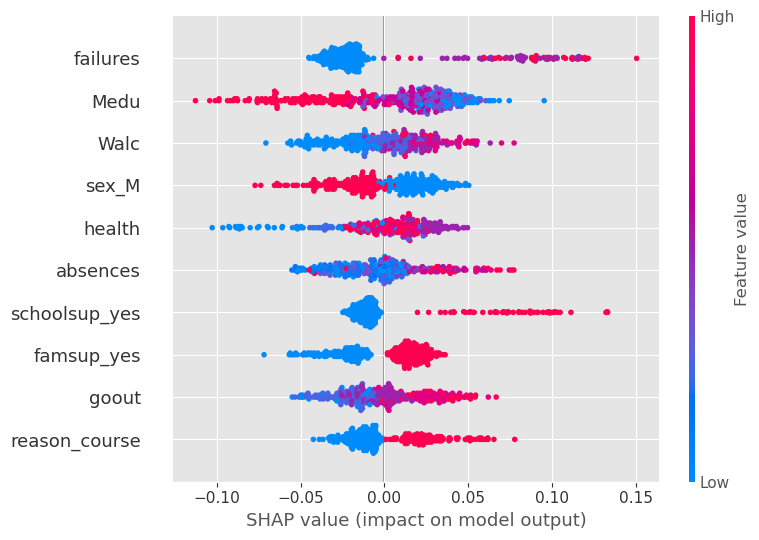

In [24]:
shap.summary_plot(shap_vals_F, X_shap, max_display=10)

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


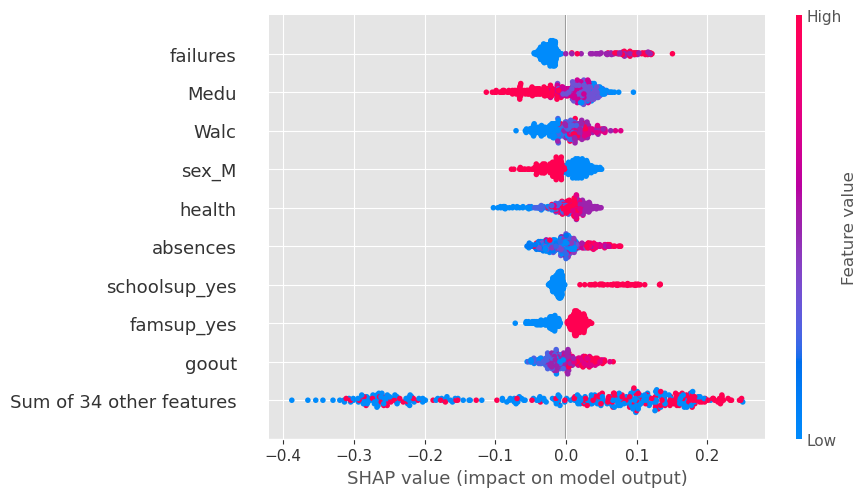

In [25]:
shap.plots.beeswarm(shap_vals_F)

## Interpret the effects of the top 5 most important features, according to SHAP.

The top 5 most important features are:
1. Failures
    - The more failures a student has, the more likely the model will predict a failing grade.
2. Medu
    - The higher the mother's education level is, the less likely the model will be at predicting a failing grade.
3. health
    - The less healthy a student is, the more likely the model will be at predicting a failing grade.
4. goout
    - The more often a student goes out with friends, the more likely the model will be at predicting a failing grade.
5. absences
    - The more absences a student has, the more likely the model will be at predicting a failing grade.

# Explaining Single Observations

**Using Top Features to Select Examples**
- Failures
- Medu
- health
- goout
- absences

## failures

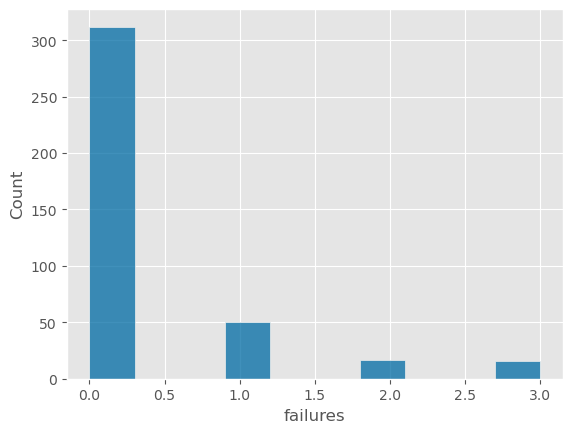

In [26]:
sns.histplot(X_shap['failures']);

In [27]:
X_shap['failures'].agg(['mean', 'median'])

mean      0.334177
median    0.000000
Name: failures, dtype: float64

In [28]:
# Finding number of failures with failures>0.
filt_failures = X_shap['failures'] > 0
len(X_shap[filt_failures])

83

In [29]:
# Checking value counts
filt_failures.value_counts()

False    312
True      83
Name: failures, dtype: int64

## Medu

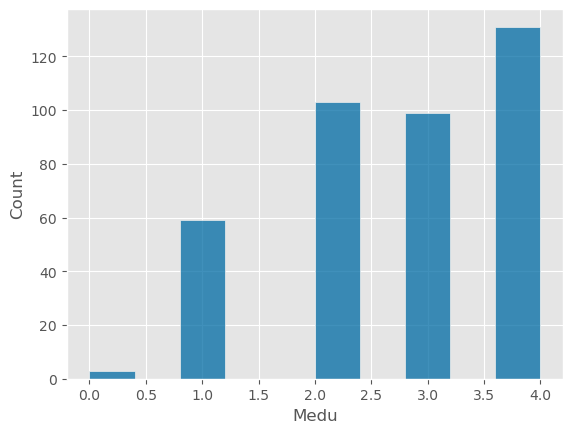

In [30]:
sns.histplot(X_shap['Medu']);

In [31]:
X_shap['Medu'].agg(['mean', 'median'])

mean      2.749367
median    3.000000
Name: Medu, dtype: float64

In [32]:
# Finding number of students with mother's that 
# did not persue a secondary education with Medu<3.
filt_medu = X_shap['Medu'] < 3
len(X_shap[filt_medu])

165

In [33]:
# Checking value counts
filt_medu.value_counts()

False    230
True     165
Name: Medu, dtype: int64

## health

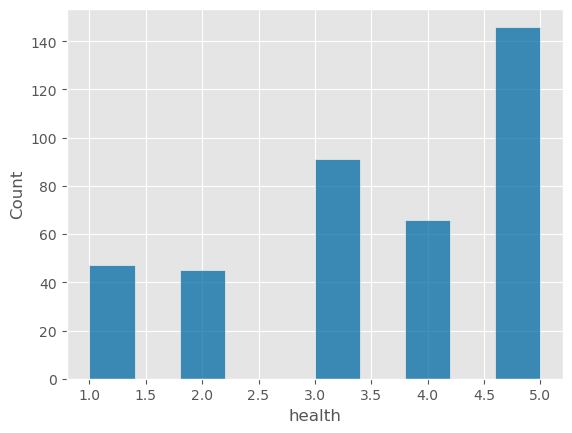

In [34]:
sns.histplot(X_shap['health']);

In [35]:
X_shap['health'].agg(['mean', 'median'])

mean      3.55443
median    4.00000
Name: health, dtype: float64

In [36]:
# Finding number of student's with very poor to poor health with health<3.
filt_health = X_shap['health'] < 3
len(X_shap[filt_health])

92

In [37]:
# Checking value counts
filt_health.value_counts()

False    303
True      92
Name: health, dtype: int64

## goout

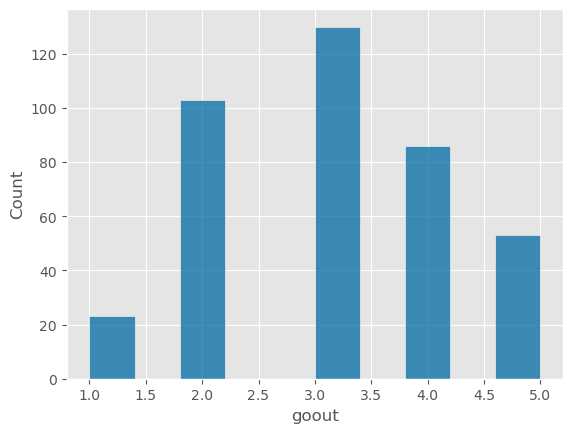

In [38]:
sns.histplot(X_shap['goout']);

In [39]:
X_shap['goout'].agg(['mean', 'median'])

mean      3.108861
median    3.000000
Name: goout, dtype: float64

In [40]:
# Finding number of students who go out with 
# friends more than two times a week with goout>2.
filt_goout = X_shap['goout'] > 2
len(X_shap[filt_goout])

269

In [41]:
# Checking value counts
filt_goout.value_counts()

True     269
False    126
Name: goout, dtype: int64

## absences

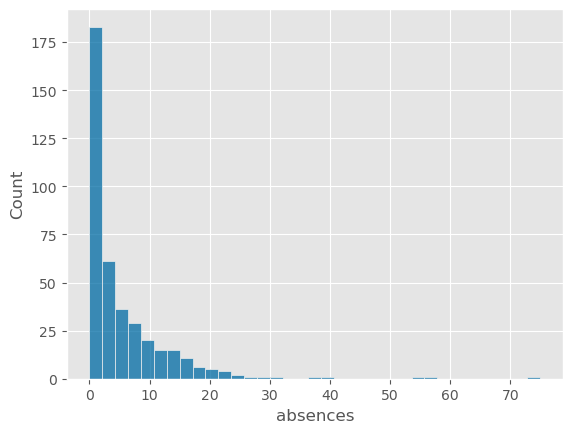

In [42]:
sns.histplot(X_shap['absences']);

In [43]:
X_shap['absences'].agg(['mean', 'median'])

mean      5.708861
median    4.000000
Name: absences, dtype: float64

In [44]:
# Finding number of absences greater than 3 with absences>3.
filt_absences = X_shap['absences'] > 3
len(X_shap[filt_absences])

204

In [45]:
# Checking value counts
filt_absences.value_counts()

True     204
False    191
Name: absences, dtype: int64

## Group A


- High Failure
- **Low Mother Education**
- Poor Health
- Goes Out With Friends Frequently
- High Absences

In [46]:
X_shap[ filt_failures & filt_medu & filt_health & filt_goout & filt_absences]

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,school_MS,sex_M,address_U,famsize_LE3,Pstatus_T,Mjob_at_home,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_at_home,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other,schoolsup_yes,famsup_yes,paid_yes,activities_yes,nursery_yes,higher_yes,internet_yes,romantic_yes
355,19.0,1.0,1.0,3.0,2.0,3.0,5.0,4.0,4.0,3.0,3.0,2.0,8.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
393,16.0,2.0,2.0,2.0,1.0,2.0,2.0,3.0,3.0,2.0,2.0,2.0,8.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0


In [47]:
idx_example_A = 393
print(f"Failed? = {y_shap.loc[idx_example_A]}")
X_shap.loc[idx_example_A]

Failed? = True


age                  16.0
Medu                  2.0
Fedu                  2.0
traveltime            2.0
studytime             1.0
failures              2.0
famrel                2.0
freetime              3.0
goout                 3.0
Dalc                  2.0
Walc                  2.0
health                2.0
absences              8.0
school_MS             0.0
sex_M                 1.0
address_U             1.0
famsize_LE3           1.0
Pstatus_T             1.0
Mjob_at_home          0.0
Mjob_health           0.0
Mjob_other            0.0
Mjob_services         1.0
Mjob_teacher          0.0
Fjob_at_home          0.0
Fjob_health           0.0
Fjob_other            0.0
Fjob_services         1.0
Fjob_teacher          0.0
reason_course         0.0
reason_home           0.0
reason_other          0.0
reason_reputation     1.0
guardian_father       1.0
guardian_mother       0.0
guardian_other        0.0
schoolsup_yes         0.0
famsup_yes            1.0
paid_yes              0.0
activities_y

## Group B


- High Failure
- **High Mother Education**
- Poor Health
- **Does Not Go Out With Friends Frequently**
- High Absences

In [48]:
X_shap[ filt_failures & ~filt_medu & filt_health & ~filt_goout & filt_absences]

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,school_MS,sex_M,address_U,famsize_LE3,Pstatus_T,Mjob_at_home,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_at_home,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other,schoolsup_yes,famsup_yes,paid_yes,activities_yes,nursery_yes,higher_yes,internet_yes,romantic_yes
7,16.0,3.0,2.0,2.0,1.0,1.0,4.0,5.0,2.0,1.0,1.0,2.0,16.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
157,19.0,3.0,2.0,2.0,2.0,1.0,4.0,2.0,2.0,1.0,2.0,1.0,22.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0


In [49]:
idx_example_B = 7
print(f"Failed? = {y_shap.loc[idx_example_B]}")
X_shap.loc[idx_example_B]

Failed? = True


age                  16.0
Medu                  3.0
Fedu                  2.0
traveltime            2.0
studytime             1.0
failures              1.0
famrel                4.0
freetime              5.0
goout                 2.0
Dalc                  1.0
Walc                  1.0
health                2.0
absences             16.0
school_MS             0.0
sex_M                 1.0
address_U             1.0
famsize_LE3           0.0
Pstatus_T             1.0
Mjob_at_home          0.0
Mjob_health           0.0
Mjob_other            0.0
Mjob_services         1.0
Mjob_teacher          0.0
Fjob_at_home          0.0
Fjob_health           0.0
Fjob_other            0.0
Fjob_services         1.0
Fjob_teacher          0.0
reason_course         1.0
reason_home           0.0
reason_other          0.0
reason_reputation     0.0
guardian_father       0.0
guardian_mother       1.0
guardian_other        0.0
schoolsup_yes         0.0
famsup_yes            1.0
paid_yes              0.0
activities_y

## Visualizing Individual Shap for Selected Examples

In [50]:
y_pred = pd.Series(rf_clf.predict(X_shap), index=X_shap.index)

### Group A

In [51]:
# Example A
print(f"Example of a Student In Group A")
print(f"True Class: Fail = {y_shap.loc[idx_example_A]}")
print(f"Predicted Class: Fail = {y_pred.loc[idx_example_A]}")

Example of a Student In Group A
True Class: Fail = True
Predicted Class: Fail = True


In [52]:
# Individual forceplot of example high failure & low mother education 
shap.force_plot(explainer.expected_value[1],
                shap_values=shap_vals_F[idx_example_A].values,
                features=X_shap.iloc[idx_example_A])

- As we can see in the force plot above for group A:
    - There were a handful of factors decreasing the likihood of a predicted failing G3 grade, such as receiving extra educational support and participating in extracuricular activities. However, there were also quite a lot of features pushing the prediction in the opposite direction, such as:
        - some weekend alcohol consumption
        - high number of absences
        - having their father as the guardian parent
        - receiving family educational support

### Group B

In [53]:
# Example B
print(f"Example of a Student In Group B")
print(f"True Class: Fail = {y_shap.loc[idx_example_B]}")
print(f"Predicted Class: Fail = {y_pred.loc[idx_example_B]}")

Example of a Student In Group B
True Class: Fail = True
Predicted Class: Fail = True


In [54]:
# Individual forceplot of example high failure & high mother 
# education & does not go our with friends frequently
shap.force_plot(explainer.expected_value[1],
                shap_values=shap_vals_F[idx_example_B].values,
                features=X_shap.iloc[idx_example_B])

- As we can see in the force plot above for group B:
    - There were very few factors that could contribute to predicting a failing G3 grade, such as little to no workday alcohol consumption and living in an urban area. However, there were also many features pushing the prediction in the opposite direction, such as:
        - having a father that did not go beyond 5th to 9th grade
        - having someone other than their mother or father as their guardian
        - having poor health
        - having less than 2 hours of weekly study time